# DAMG7245 Assignment 1

## Analysing SEVIR Dataset

In [2]:
import boto3
from botocore.handlers import disable_signing
resource = boto3.resource('s3')
resource.meta.client.meta.events.register('choose-signer.s3.*', disable_signing)
bucket=resource.Bucket('sevir')

In [3]:
objs=bucket.objects.filter(Prefix='')
print([o.key for o in objs])

['CATALOG.csv', 'data/', 'data/ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0101_0430.h5', 'data/ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0501_0831.h5', 'data/ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0901_1231.h5', 'data/ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0101_0630.h5', 'data/ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0701_1231.h5', 'data/ir069/2019/SEVIR_IR069_RANDOMEVENTS_2019_0101_0430.h5', 'data/ir069/2019/SEVIR_IR069_RANDOMEVENTS_2019_0501_0831.h5', 'data/ir069/2019/SEVIR_IR069_RANDOMEVENTS_2019_0901_1231.h5', 'data/ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0630.h5', 'data/ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0701_1231.h5', 'data/ir107/2018/SEVIR_IR107_RANDOMEVENTS_2018_0101_0430.h5', 'data/ir107/2018/SEVIR_IR107_RANDOMEVENTS_2018_0501_0831.h5', 'data/ir107/2018/SEVIR_IR107_RANDOMEVENTS_2018_0901_1231.h5', 'data/ir107/2018/SEVIR_IR107_STORMEVENTS_2018_0101_0630.h5', 'data/ir107/2018/SEVIR_IR107_STORMEVENTS_2018_0701_1231.h5', 'data/ir107/2019/SEVIR_IR107_RANDOMEVENTS_2019_0101

In [4]:
# Enter path to the SEVIR data location
DATA_PATH    = 'M:/BigData/SEVIR/data'
CATALOG_PATH = 'M:/BigData/SEVIR/CATALOG.csv'

In [5]:
import pandas as pd
catalog = pd.read_csv('M:/BigData/SEVIR/CATALOG.csv',parse_dates=['time_utc'],low_memory=False)
catalog.head(5)

,id,file_name,file_index,img_type,time_utc,minute_offsets,episode_id,event_id,event_type,llcrnrlat,...,urcrnrlat,urcrnrlon,proj,size_x,size_y,height_m,width_m,data_min,data_max,pct_missing
0,R18032505027684,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,0,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,33.216708,...,36.336627,-87.070254,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,-0.003361,0.005600,0.0
1,R18032505027677,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,1,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,33.084309,...,36.213723,-87.301535,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,-0.003361,0.005600,0.0
2,R18032505027721,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,2,vis,2018-03-25 05:00:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,46.661866,...,50.883159,-120.009277,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,-0.002870,0.005548,0.0
3,R18032516508249,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,3,vis,2018-03-25 16:50:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,40.883237,...,43.686191,-79.903987,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,0.029911,0.785600,0.0
4,R18032516507621,vis/2018/SEVIR_VIS_RANDOMEVENTS_2018_0321_0331.h5,4,vis,2018-03-25 16:50:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,NaN,NaN,NaN,44.946047,...,49.169436,-120.575175,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,0.028560,0.792610,0.0


In [6]:
files = list(catalog[catalog.event_id == 835047].file_name)
files

['vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5',
 'ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0630.h5',
 'ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0630.h5',
 'vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5',
 'lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5']

In [83]:
bucket.download_file("data/vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5","M:/BigData/SEVIR/data/vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5")

In [86]:
bucket.download_file("data/vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5","M:/BigData/SEVIR/data/vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5")

In [87]:
bucket.download_file("data/ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0630.h5","M:/BigData/SEVIR/data/ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0630.h5")

In [88]:
bucket.download_file("data/ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0630.h5","M:/BigData/SEVIR/data/ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0630.h5")

In [89]:
bucket.download_file("data/lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5","M:/BigData/SEVIR/data/lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5")

Event ID: b'S835047'
Image shape: (384, 384, 49)


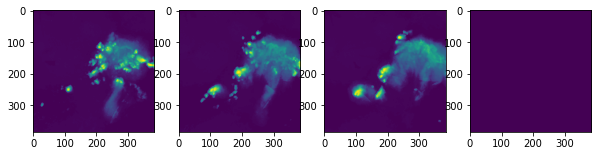

In [7]:
import os
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
 
file_index = 14
with h5py.File('%s/vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5' % DATA_PATH,'r') as hf:
    event_id = hf['id'][file_index]
    vil      = hf['vil'][file_index] 
    
print('Event ID:',event_id)
print('Image shape:',vil.shape)

fig,axs=plt.subplots(1,4,figsize=(10,5))
axs[0].imshow(vil[:,:,10])
axs[1].imshow(vil[:,:,20])
axs[2].imshow(vil[:,:,30])
axs[3].imshow(vil[:,:,40])
plt.show()
file_index = 0


In [8]:
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
import pandas as pd  

# Read catalog
catalog = pd.read_csv(CATALOG_PATH,parse_dates=['time_utc'],low_memory=False)

# Desired image types
img_types = set(['vis','ir069','ir107','vil'])

# Group by event id, and filter to only events that have all desired img_types
events = catalog.groupby('id').filter(lambda x: img_types.issubset(set(x['img_type']))).groupby('id')
event_ids = list(events.groups.keys())
#print(event_ids.index('S835047'))
print('Found %d events matching' % len(event_ids),img_types)

# Grab a sample event and view catalog entries
index = event_ids.index('S835047')
sample_event = events.get_group( event_ids[index])
print('Sample Event:',event_ids[index])
sample_event

Found 12739 events matching {'vil', 'ir069', 'ir107', 'vis'}
Sample Event: S835047


,id,file_name,file_index,img_type,time_utc,minute_offsets,episode_id,event_id,event_type,llcrnrlat,...,urcrnrlat,urcrnrlon,proj,size_x,size_y,height_m,width_m,data_min,data_max,pct_missing
19299,S835047,vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5,14,vil,2019-06-26 21:32:00,-122:-117:-112:-107:-102:-97:-92:-87:-82:-77:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384,384,384000.0,384000.0,0.000000,254.000000,0.290709
22412,S835047,ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0...,12,ir107,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-72.195297,30.619873,0.000000
29236,S835047,ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0...,12,ir069,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-72.988350,-21.160448,0.000000
41182,S835047,vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5,34,vis,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,0.017251,1.159615,0.000000
72402,S835047,lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5,0,lght,2019-06-26 21:32:00,NaN,138836.0,835047.0,Hail,35.015742,...,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,328332.000000,0.000000


(<matplotlib.image.AxesImage at 0x294ee6da130>, Text(0.5, 1.0, 'VIL'))

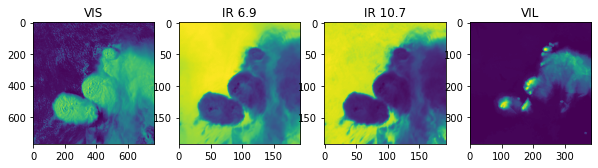

In [9]:
def read_data( sample_event, img_type, data_path=DATA_PATH ):
    """
    Reads single SEVIR event for a given image type.
    
    Parameters
    ----------
    sample_event   pd.DataFrame
        SEVIR catalog rows matching a single ID
    img_type   str
        SEVIR image type
    data_path  str
        Location of SEVIR data
    
    Returns
    -------
    np.array
       LxLx49 tensor containing event data
    """
    fn = sample_event[sample_event.img_type==img_type].squeeze().file_name
    fi = sample_event[sample_event.img_type==img_type].squeeze().file_index
    with h5py.File(data_path + '/' + fn,'r') as hf:
        data=hf[img_type][fi] 
    return data

vis = read_data(sample_event, 'vis')
ir069 = read_data(sample_event, 'ir069')
ir107 = read_data(sample_event, 'ir107')
vil = read_data(sample_event, 'vil')

# plot a frame from each img_type
fig,axs = plt.subplots(1,4,figsize=(10,5))
frame_idx = 30
axs[0].imshow(vis[:,:,frame_idx]), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx]), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx]), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx]), axs[3].set_title('VIL')

(<matplotlib.image.AxesImage at 0x294ee9dc700>, Text(0.5, 1.0, 'Lightning'))

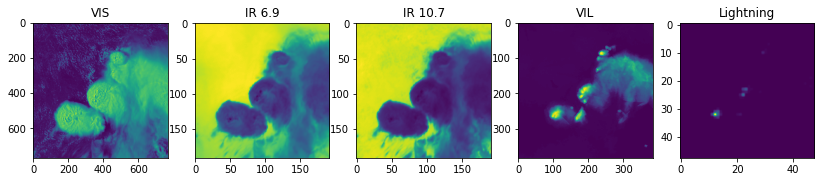

In [10]:
import numpy as np
def lght_to_grid(data):
    """
    Converts SEVIR lightning data stored in Nx5 matrix to an LxLx49 tensor representing
    flash counts per pixel per frame
    
    Parameters
    ----------
    data  np.array
       SEVIR lightning event (Nx5 matrix)
       
    Returns
    -------
    np.array 
       LxLx49 tensor containing pixel counts
    """
    FRAME_TIMES = np.arange(-120.0,125.0,5) * 60 # in seconds
    out_size = (48,48,len(FRAME_TIMES))
    if data.shape[0]==0:
        return np.zeros(out_size,dtype=np.float32)

    # filter out points outside the grid
    x,y=data[:,3],data[:,4]
    m=np.logical_and.reduce( [x>=0,x<out_size[0],y>=0,y<out_size[1]] )
    data=data[m,:]
    if data.shape[0]==0:
        return np.zeros(out_size,dtype=np.float32)

    # Filter/separate times
    # compute z coodinate based on bin locaiton times
    t=data[:,0]
    z=np.digitize(t,FRAME_TIMES)-1
    z[z==-1]=0 # special case:  frame 0 uses lght from frame 1

    x=data[:,3].astype(np.int64)
    y=data[:,4].astype(np.int64)

    k=np.ravel_multi_index(np.array([y,x,z]),out_size)
    n = np.bincount(k,minlength=np.prod(out_size))
    return np.reshape(n,out_size).astype(np.float32)

def read_lght_data( sample_event, data_path=DATA_PATH ):
    """
    Reads lght data from SEVIR and maps flash counts onto a grid  
    
    Parameters
    ----------
    sample_event   pd.DataFrame
        SEVIR catalog rows matching a single ID
    data_path  str
        Location of SEVIR data
    
    Returns
    -------
    np.array 
       LxLx49 tensor containing pixel counts for selected event
    
    """
    fn = sample_event[sample_event.img_type=='lght'].squeeze().file_name
    id = sample_event[sample_event.img_type=='lght'].squeeze().id
    with h5py.File(data_path + '/' + fn,'r') as hf:
        data      = hf[id][:] 
    return lght_to_grid(data)

lght = read_lght_data(sample_event)

# include lightning counts in plot
fig,axs = plt.subplots(1,5,figsize=(14,5))
frame_idx = 30
axs[0].imshow(vis[:,:,frame_idx]), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx]), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx]), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx]), axs[3].set_title('VIL')
axs[4].imshow(lght[:,:,frame_idx]), axs[4].set_title('Lightning')

In [60]:
#! git clone https://github.com/MIT-AI-Accelerator/eie-sevir.git

In [11]:
import sys
import pprint

pprint.pprint(sys.path)

['M:\\BigData\\SEVIR',
 'C:\\Users\\moksh\\anaconda3\\python39.zip',
 'C:\\Users\\moksh\\anaconda3\\DLLs',
 'C:\\Users\\moksh\\anaconda3\\lib',
 'C:\\Users\\moksh\\anaconda3',
 '',
 'C:\\Users\\moksh\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\Users\\moksh\\anaconda3\\lib\\site-packages',
 'C:\\Users\\moksh\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg',
 'C:\\Users\\moksh\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\moksh\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\moksh\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\moksh\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\moksh\\.ipython']


(<matplotlib.image.AxesImage at 0x294eecdcac0>, Text(0.5, 1.0, 'Lightning'))

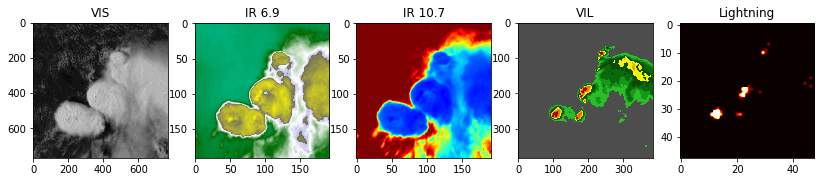

In [12]:

import sys
sys.path.append('../sevir/data') # add sevir module to path
import matplotlib.pyplot as plt
from sevir.display import get_cmap

vis_cmap,vis_norm,vis_vmin,vis_vmax = get_cmap('vis',encoded=True)
ir069_cmap,ir069_norm,ir069_vmin,ir069_vmax = get_cmap('ir069',encoded=True)
ir107_cmap,ir107_norm,ir107_vmin,ir107_vmax = get_cmap('ir107',encoded=True)
vil_cmap,vil_norm,vil_vmin,vil_vmax = get_cmap('vil',encoded=True)
lght_cmap,lght_norm,lght_vmin,lght_vmax = get_cmap('lght',encoded=True)

fig,axs = plt.subplots(1,5,figsize=(14,5))
frame_idx = 30
axs[0].imshow(vis[:,:,frame_idx],cmap=vis_cmap,norm=vis_norm), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx],cmap=ir069_cmap,norm=ir069_norm,vmin=ir069_vmin,vmax=ir069_vmax), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx],cmap=ir107_cmap,norm=ir107_norm,vmin=ir107_vmin,vmax=ir107_vmax), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx],cmap=vil_cmap,norm=vil_norm,vmin=vil_vmin,vmax=vil_vmax), axs[3].set_title('VIL')
axs[4].imshow(lght[:,:,frame_idx],cmap=lght_cmap,norm=lght_norm,vmin=lght_vmin,vmax=lght_vmax), axs[4].set_title('Lightning')

In [13]:
sample_event.proj.values[0]

'+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=6370997.0 +ellps=sphere '

In [14]:
import re
import numpy as np
class LaeaProjection():
    """
    Translates between pixel coordinates (X,Y) and Lat lon coordinates for a given SEVIR event
    projected in laea.
    
    Parameters
    ----------
    event  pd.Series
        One row from SEVIR catalog
    """
    def __init__(self,event):
        self.proj = event.proj 
        self.lat0 = float(re.compile('\+lat_0=([+-]?\d+)').search(self.proj).groups()[0])
        self.lon0 = float(re.compile('\+lon_0=([+-]?\d+)').search(self.proj).groups()[0])
        self.R = float(re.compile('\+a=(\d+)').search(self.proj).groups()[0])
        self.llcrnlat = event.llcrnrlat
        self.llcrnlon = event.llcrnrlon
        self.refX, self.refY = self.forward(self.llcrnlon,self.llcrnlat,pixel=False)
        self.binX = event.width_m / event.size_x
        self.binY = event.height_m / event.size_y
        
    def forward(self,lon,lat,pixel=True):
        """
        Maps lat/lon to pixel x,y.  For projection coordinates instead of pixel, set pixel=False.
        """
        sind = lambda t: np.sin(t*np.pi/180)
        cosd = lambda t: np.cos(t*np.pi/180)
        k = self.R * np.sqrt(2/(1+sind(self.lat0)*sind(lat)+cosd(self.lat0)*cosd(lat)*cosd(lon-self.lon0)))
        x = k*cosd(lat)*sind(lon-self.lon0)
        y = k*(cosd(self.lat0)*sind(lat) - sind(self.lat0)*cosd(lat)*cosd(lon-self.lon0))
        if pixel:
            x = (x-self.refX) / self.binX
            y = (y-self.refY) / self.binY
        return x,y
    def inverse(self,x,y,pixel=True):
        """
        Maps pixel coordinates to (lon,lat) position.  If passing projection corrdinates, set pixel=False.
        """
        if pixel:
            x = x*self.binX + self.refX
            y = y*self.binY + self.refY
        x/=self.R
        y/=self.R
        sind = lambda t: np.sin(t*np.pi/180)
        cosd = lambda t: np.cos(t*np.pi/180)
        rho = np.sqrt(x*x+y*y)
        c = 2*np.arcsin(0.5*rho)
        sinc = np.sin(c)
        cosc = np.cos(c)
        lat = 180/np.pi*np.arcsin(cosc*sind(self.lat0)+y*sinc*cosd(self.lat0)/rho)
        lon = self.lon0+180/np.pi*np.arctan(x*sinc/(rho*cosd(self.lat0)*cosc - y*sind(self.lat0)*sinc))
        return lon,lat

Text(0.5, 1.0, 'Pixel Longitudes')

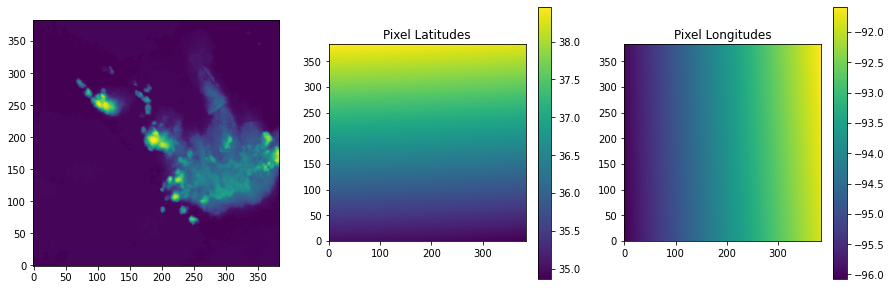

In [15]:
proj = LaeaProjection( sample_event[sample_event.img_type=='vil'].squeeze() )
X,Y = np.meshgrid(np.arange(vil.shape[0]),np.arange(vil.shape[0]))
lons,lats = proj.inverse(X,Y)

# Plot with origin='lower' so up corresponds to north.
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(vil[:,:,20],origin='lower')
la = ax[1].imshow(lats,origin='lower') 
fig.colorbar(la,ax=ax[1]) 
ax[1].set_title('Pixel Latitudes')
lo = ax[2].imshow(lons,origin='lower') 
fig.colorbar(lo,ax=ax[2]) 
ax[2].set_title('Pixel Longitudes')

x=277.704773,y=262.202827


Text(247.70477336141732, 232.20282667271726, 'Marshfield, MO')

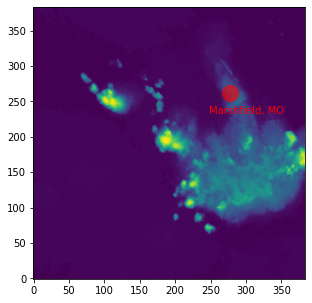

In [29]:
lat,lon = 37.278169, -92.868599 #Marshfield Missouri
x,y=proj.forward(lon,lat)
print('x=%f,y=%f' % (x,y))
# Plot with origin='lower' so up corresponds to north.
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.imshow(vil[:,:,20],origin='lower')
ax.plot(x,y,linestyle='none', marker="o", markersize=16, alpha=0.6, c="red")
ax.text(x-30,y-30,'Marshfield, MO',color='r')

In [22]:
sample_event[sample_event.img_type=='vil'].squeeze()

id                                                          S835047
file_name          vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5
file_index                                                       14
img_type                                                        vil
time_utc                                        2019-06-26 21:32:00
minute_offsets    -122:-117:-112:-107:-102:-97:-92:-87:-82:-77:-...
episode_id                                                 138836.0
event_id                                                   835047.0
event_type                                                     Hail
llcrnrlat                                                 35.015742
llcrnrlon                                                -96.067844
urcrnrlat                                                 38.311287
urcrnrlon                                                -91.574426
proj              +proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...
size_x                                          

In [23]:
pip install basemap basemap-data-hires

Note: you may need to restart the kernel to use updated packages.


Text(258928.69056273164, 219550.73680775572, 'Marshfield, MO')

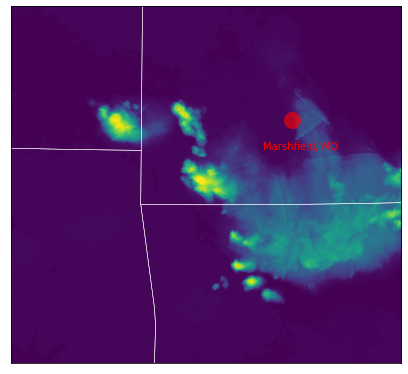

In [30]:
# Note:  Requires basemap module to run
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.basemap import Basemap # conda/pip install basemap basemap-data-hires
# Create Basemap Object
s=sample_event[sample_event.img_type=='vil'].squeeze()
fig,ax=plt.subplots(1,1,figsize=(7,7))
m = Basemap(llcrnrlat=s.llcrnrlat, llcrnrlon=s.llcrnrlon,
            urcrnrlat=s.urcrnrlat,urcrnrlon=s.urcrnrlon,
            width=s.width_m, height=s.height_m,
            lat_0=36.6, lon_0=-93.8,
            projection='laea',
            resolution='i',
            ax=ax)
m.drawstates(color='w')
# m.drawcoastlines(ax = ax,color='w')
m.drawcountries(color='w')
m.imshow(vil[:,:,24])

lat,lon = 37.278169, -92.868599 # Marshfield, MO
x,y=m(lon,lat) # will be in projection coordinates
m.plot(x,y,linestyle='none', marker="o", markersize=16, alpha=0.6, c="red")
ax.text(x-30e3,y-30e3,'Marshfield, MO',color='r')